In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import random
import os
from pandas.plotting import register_matplotlib_converters
from scipy.interpolate import interp1d
from datetime import datetime

LOAD DATA

In [3]:
charging_dfs = {}

for i in range(1, 100):
    filename = f"data/charger_battery_data_Charger{str(i).zfill(2)}.csv"
    print("imported: ", filename)
    if os.path.isfile(filename):
        charging_dfs[i] = pd.read_csv(filename)
        charging_dfs[i] = charging_dfs[i].reset_index()
        charging_dfs[i]['timestamp'] = pd.to_datetime(charging_dfs[i]['timestamp'], utc=True)
        charging_dfs[i].set_index('timestamp', inplace=True)

    else:
        break

charging_dfs.keys()

imported:  data/charger_battery_data_Charger01.csv
imported:  data/charger_battery_data_Charger02.csv
imported:  data/charger_battery_data_Charger03.csv
imported:  data/charger_battery_data_Charger04.csv
imported:  data/charger_battery_data_Charger05.csv
imported:  data/charger_battery_data_Charger06.csv
imported:  data/charger_battery_data_Charger07.csv
imported:  data/charger_battery_data_Charger08.csv
imported:  data/charger_battery_data_Charger09.csv
imported:  data/charger_battery_data_Charger10.csv


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])

DESCRIPTIVE ANALYSIS:

ChargerID: 4
       e_production  e_consumption    e_charger
count  35040.000000   35040.000000  4080.000000
mean     444.646796     178.959799   458.873994
std      699.721683     189.047990   879.917091
min        0.000000       0.000000     0.000000
25%        0.000000      79.000000     0.000000
50%        0.000000     121.000000     0.000000
75%      708.000000     216.000000    22.755556
max     3321.000000    3092.000000  2572.526496
       h_countdown       soc_ev
count  4012.000000  4012.000000
mean     15.101196     0.875000
std      13.780962     0.212720
min       0.250000     0.000000
25%       4.500000     0.835911
50%      11.500000     0.999813
75%      20.750000     1.000000
max      68.750000     1.000000


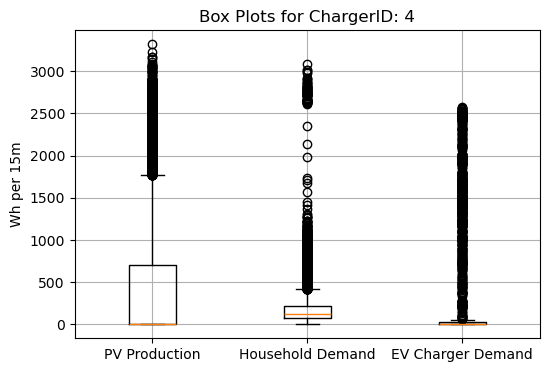

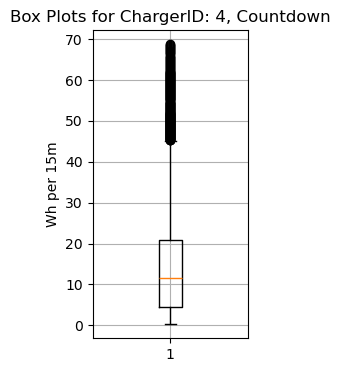

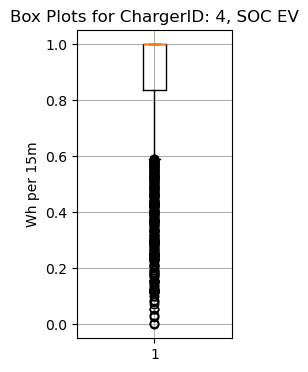

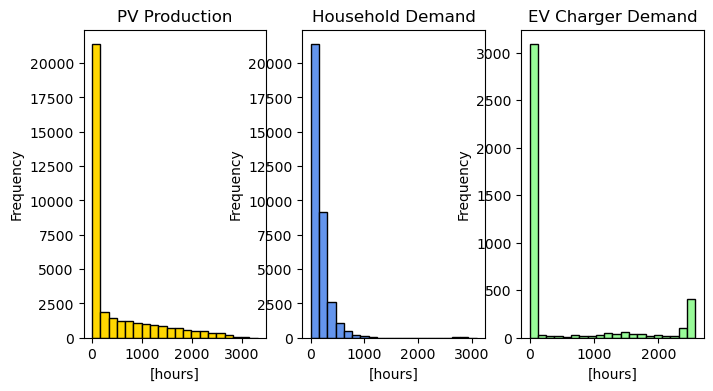

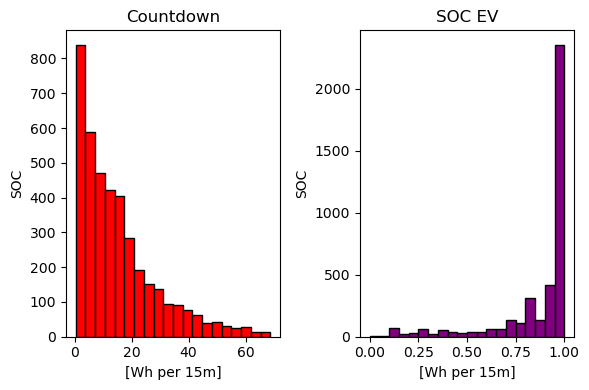

ChargerID: 6
       e_production  e_consumption    e_charger
count  35040.000000   35040.000000  6494.000000
mean     455.129866     340.345698   212.520826
std      710.322041     326.104547   458.488573
min        0.000000       0.000000     0.000000
25%        0.000000      70.000000     0.000000
50%        0.000000     127.000000     0.000000
75%      744.000000     597.000000     0.000000
max     3157.000000    4825.000000  2585.340171
       h_countdown       soc_ev
count  6426.000000  6426.000000
mean     18.203743     0.925129
std      16.928956     0.157635
min       0.250000     0.000000
25%       6.500000     0.952473
50%      13.250000     1.000000
75%      23.500000     1.000000
max      94.250000     1.000000


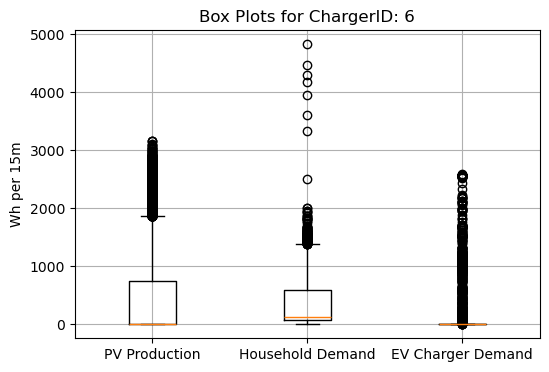

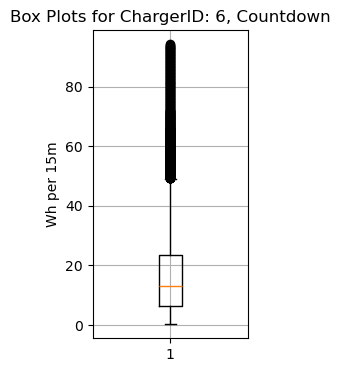

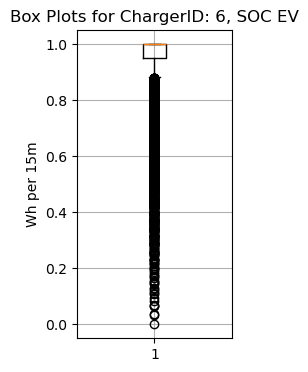

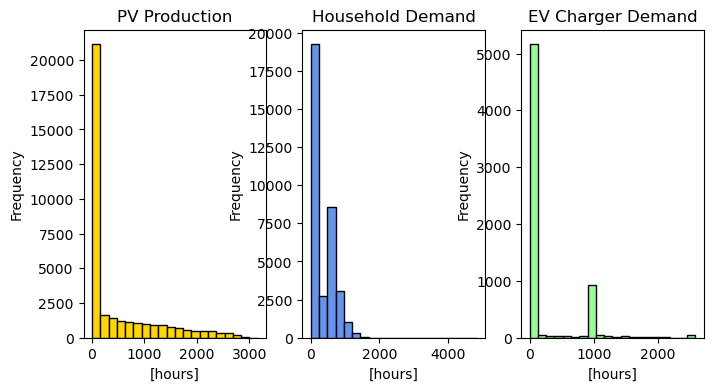

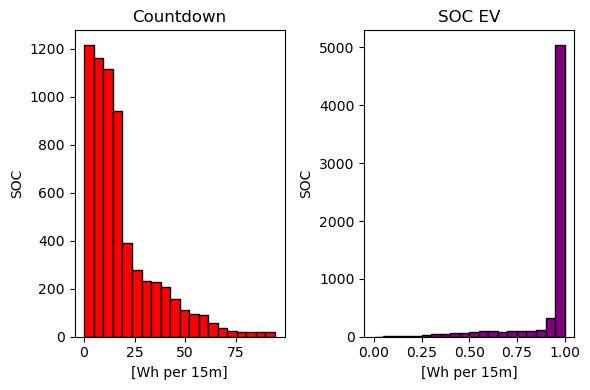

ChargerID: 9
       e_production  e_consumption    e_charger
count  35040.000000   35040.000000  7366.000000
mean     279.909932     182.519168   436.711612
std      471.945754     232.893893   649.195875
min        0.000000       0.000000     0.000000
25%        0.000000      34.000000     0.000000
50%        0.000000      83.000000     0.000000
75%      371.000000     237.419231  1040.000000
max     2022.000000    2188.000000  1739.022222
       h_countdown       soc_ev
count  7007.000000  7007.000000
mean      6.238404     0.889159
std       5.368740     0.188028
min       0.250000     0.000000
25%       1.500000     0.825812
50%       4.500000     1.000000
75%      10.000000     1.000000
max      27.000000     1.000000


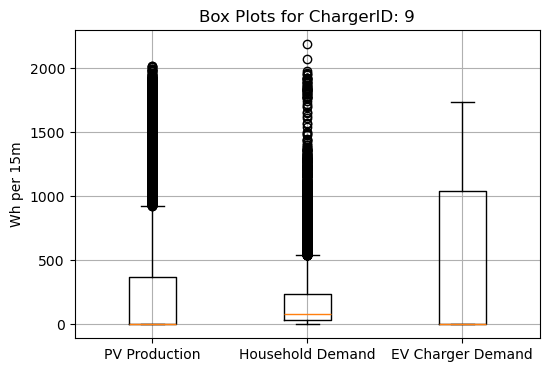

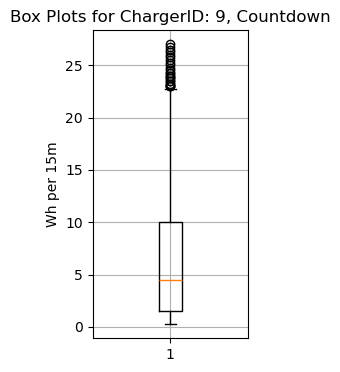

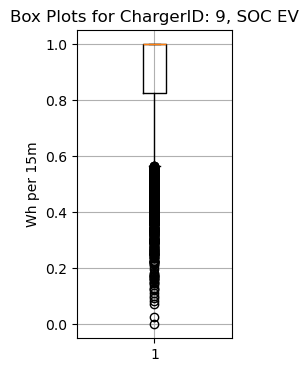

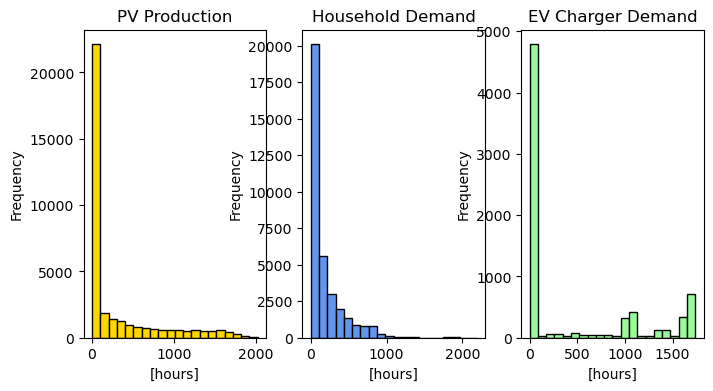

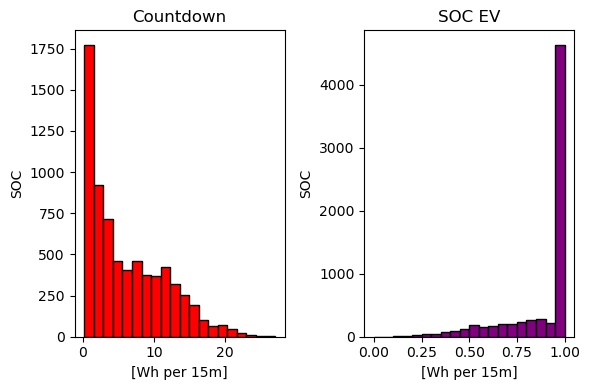

In [6]:
for i, df in charging_dfs.items():
    
    #if i > 1:
    #    continue

    if not i in [4,6,9]:
        continue

    columns1 = ['e_production', 'e_consumption', 'e_charger']
    labels1 = ['PV Production', 'Household Demand', 'EV Charger Demand']
    colors1 = ['gold', 'cornflowerblue', 'palegreen']

    columns2 = ['h_countdown', 'soc_ev']
    labels2 = ['Countdown', 'SOC EV']
    colors2 = ['red', 'purple']
    
    
    print("ChargerID:" ,i)
    print(df[columns1].describe())
    print(df[columns2][df[columns2[0]] > 0].describe())

    # create a boxplot for each dataframe
    plt.figure(figsize=(6, 4))
    plt.boxplot([df[col].dropna() for col in columns1], labels=labels1)
    plt.ylabel('Wh per 15m')
    plt.title(f'Box Plots for ChargerID: {i}')
    plt.grid(True)
    plt.show()

    for j in range(0,2):
        # create a boxplot for each dataframe
        plt.figure(figsize=(2, 4))
        plt.boxplot(df[columns2[j]][df['h_countdown']>0])
        plt.ylabel('Wh per 15m')
        plt.title(f'Box Plots for ChargerID: {i}, {labels2[j]}')
        plt.grid(True)
        plt.show()

    # create histograms for each dataframe
    plt.figure(figsize=(8, 4))
    for j, (col, color, title) in enumerate(zip(columns1, colors1, labels1)):
        plt.subplot(1, 3, j+1)
        plt.hist(df[col].dropna(), bins=20, color=color, edgecolor='black')
        plt.xlabel(f'[hours]')
        plt.ylabel('Frequency')
        plt.title(labels1[j])

        # create histograms for each dataframe
    plt.figure(figsize=(6, 4))
    for j, (col, color, title) in enumerate(zip(columns2, colors2, labels2)):
        plt.subplot(1, 2, j+1)
        plt.hist(df[col][df['h_countdown']>0], bins=20, color=color, edgecolor='black')
        plt.xlabel(f'[Wh per 15m]')
        plt.ylabel('SOC')
        plt.title(labels2[j])

    plt.tight_layout()
    #plt.savefig(f'histos_{i}.png', transparent=True, bbox_inches='tight')
    plt.show()



        e_production  e_consumption     e_charger
count  315360.000000  315360.000000  26091.000000
mean      314.439203     193.738378    484.023207
std       544.802339     207.178393    776.035927
min         0.000000       0.000000      0.000000
25%         0.000000      66.000000      0.000000
50%         0.000000     117.000000      0.000000
75%       396.000000     206.000000    967.541880
max      3321.000000    4825.000000   2585.340171
        h_countdown        soc_ev
count  25271.000000  25271.000000
mean      10.579577      0.879765
std       12.243418      0.202250
min        0.250000      0.000000
25%        2.500000      0.831368
50%        6.750000      1.000000
75%       13.750000      1.000000
max       94.250000      1.000000


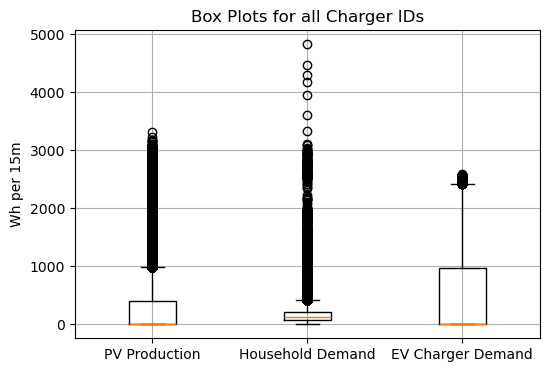

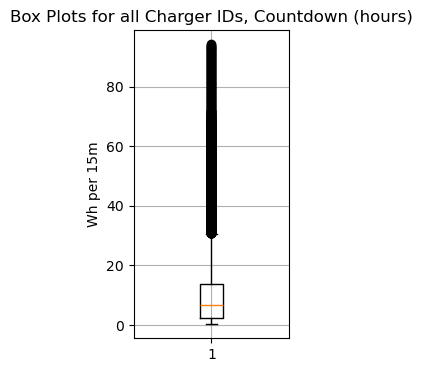

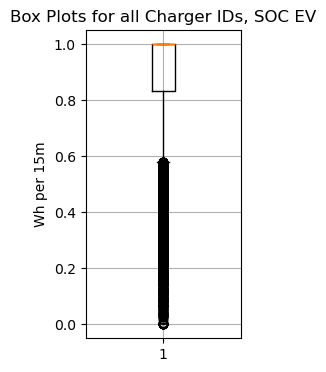

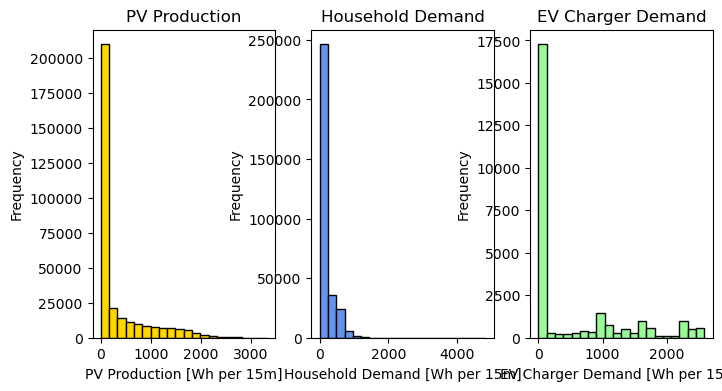

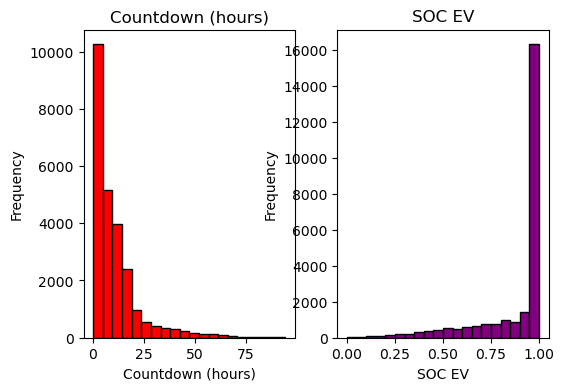

In [61]:

all_data = pd.concat(charging_dfs.values(), ignore_index=True)    

columns1 = ['e_production', 'e_consumption', 'e_charger']
labels1 = ['PV Production', 'Household Demand', 'EV Charger Demand']
colors1 = ['gold', 'cornflowerblue', 'palegreen']

columns2 = ['h_countdown', 'soc_ev']
labels2 = ['Countdown (hours)', 'SOC EV']
colors2 = ['red', 'purple']
    
    
print(all_data[columns1].describe())
print(all_data[columns2][all_data['h_countdown'] > 0].describe())

# create a boxplot for each dataframe
plt.figure(figsize=(6, 4))
plt.boxplot([all_data[col].dropna() for col in columns1], labels=labels1)
plt.ylabel('Wh per 15m')
plt.title(f'Box Plots for all Charger IDs')
plt.grid(True)
plt.show()

for j in range(0,2):
    # create a boxplot for each dataframe
    plt.figure(figsize=(2, 4))
    plt.boxplot(all_data[columns2[j]][all_data['h_countdown']>0])
    plt.ylabel('Wh per 15m')
    plt.title(f'Box Plots for all Charger IDs, {labels2[j]}')
    plt.grid(True)
    plt.show()

# create histograms for each dataframe
plt.figure(figsize=(8, 4))
for j, (col, color, title) in enumerate(zip(columns1, colors1, labels1)):
    plt.subplot(1, 3, j+1)
    plt.hist(all_data[col].dropna(), bins=20, color=color, edgecolor='black')
    plt.xlabel(f'{title} [Wh per 15m]')
    plt.ylabel('Frequency')
    plt.title(title)

    # create histograms for each dataframe
plt.figure(figsize=(6, 4))
for j, (col, color, title) in enumerate(zip(columns2, colors2, labels2)):
    plt.subplot(1, 2, j+1)
    plt.hist(all_data[col][all_data['h_countdown']>0], bins=20, color=color, edgecolor='black')
    plt.xlabel(f'{title}')
    plt.ylabel('Frequency')
    plt.title(title)

In [8]:
e_production_colors = ['gold', 'orange', 'brown']
e_consumption_colors = ['deepskyblue', 'cornflowerblue', 'purple']
e_charger_colors = ['palegreen', 'mediumseagreen', 'forestgreen']

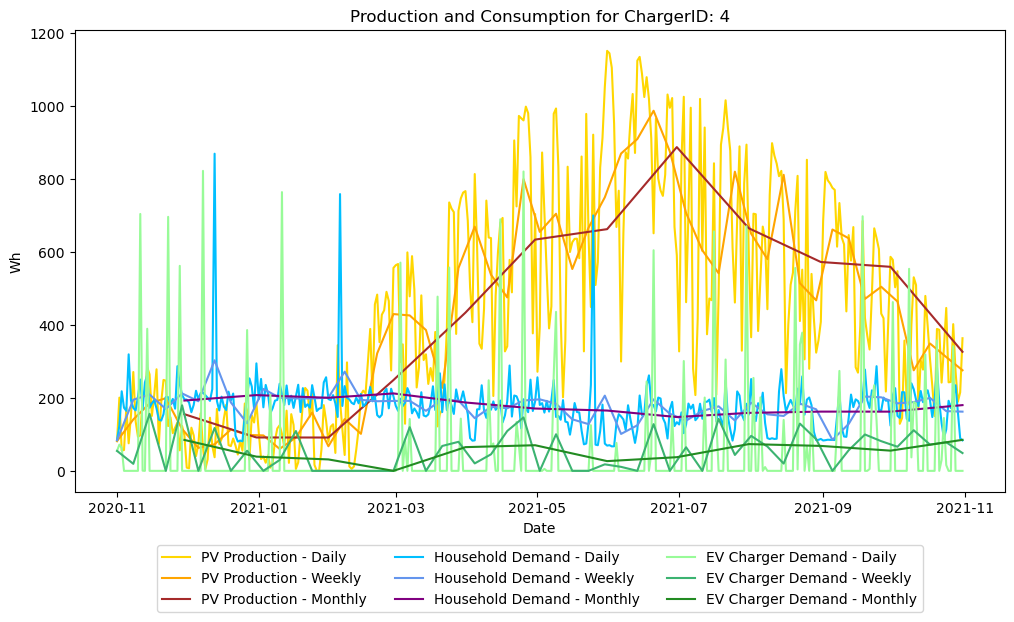

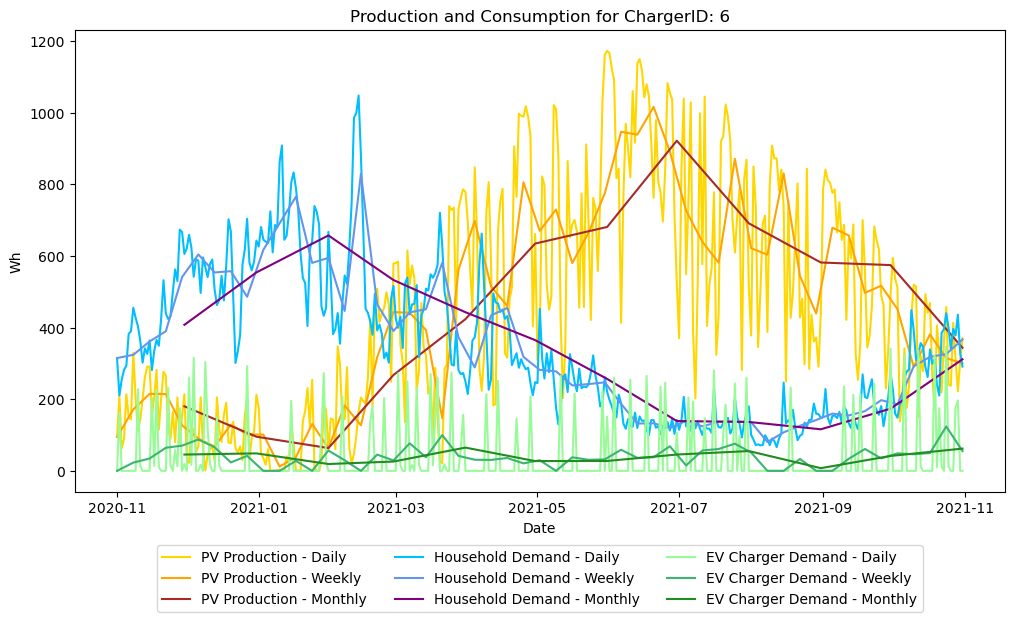

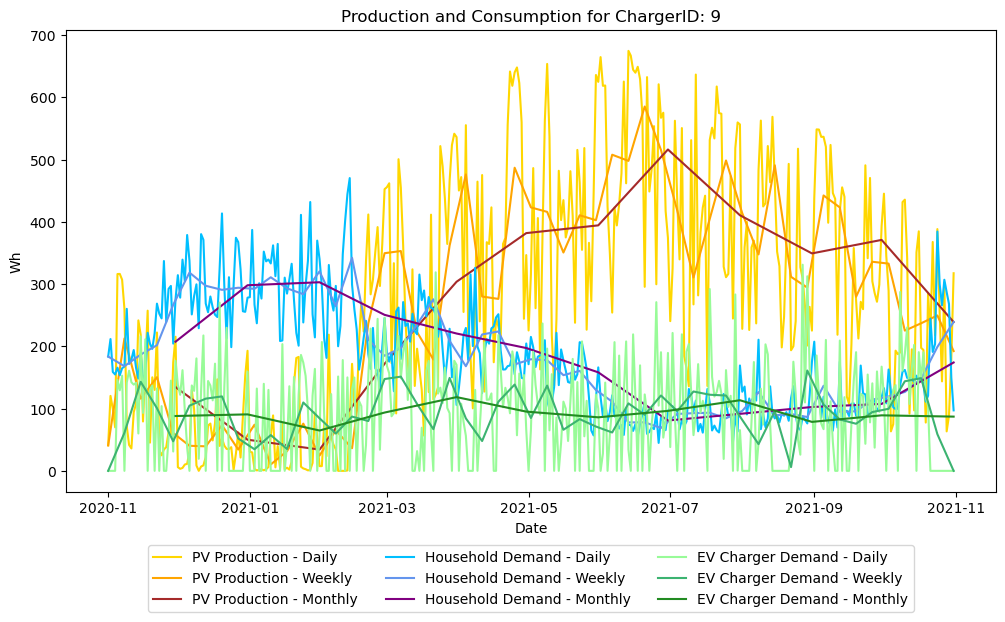

In [9]:

for i, dfi in charging_dfs.items():
    # fill NaNs in 'e_charger' with 0
    #df['e_charger'].fillna(0, inplace=True)
    
    df = dfi.fillna({'e_charger':0}, inplace=False)

    #if i > 1:
    #    continue
    if not i in [4,6,9]:
        continue

    # Resample the time series to daily, weekly, and monthly frequencies
    plt.figure(figsize=(12, 6))
    plt.plot(df.resample('D')['e_production'].mean(), label='PV Production - Daily', color=e_production_colors[0])
    plt.plot(df.resample('W')['e_production'].mean(), label='PV Production - Weekly', color=e_production_colors[1])
    plt.plot(df.resample('ME')['e_production'].mean(), label='PV Production - Monthly', color=e_production_colors[2])

    plt.plot(df.resample('D')['e_consumption'].mean(), label='Household Demand - Daily', color=e_consumption_colors[0])
    plt.plot(df.resample('W')['e_consumption'].mean(), label='Household Demand - Weekly', color=e_consumption_colors[1])
    plt.plot(df.resample('ME')['e_consumption'].mean(), label='Household Demand - Monthly', color=e_consumption_colors[2])

    plt.plot(df.resample('D')['e_charger'].mean(), label='EV Charger Demand - Daily', color=e_charger_colors[0])
    plt.plot(df.resample('W')['e_charger'].mean(), label='EV Charger Demand - Weekly', color=e_charger_colors[1])
    plt.plot(df.resample('ME')['e_charger'].mean(), label='EV Charger Demand - Monthly', color=e_charger_colors[2])

    plt.xlabel('Date')
    plt.ylabel('Wh')

    # Move the legend underneath the plot and make it wider with multiple columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

    plt.title(f'Production and Consumption for ChargerID: {i}')

    # Save the figure with transparent background
    #plt.savefig(f'Production_and_Consumption_{i}.png', transparent=True, bbox_inches='tight')

    plt.show()


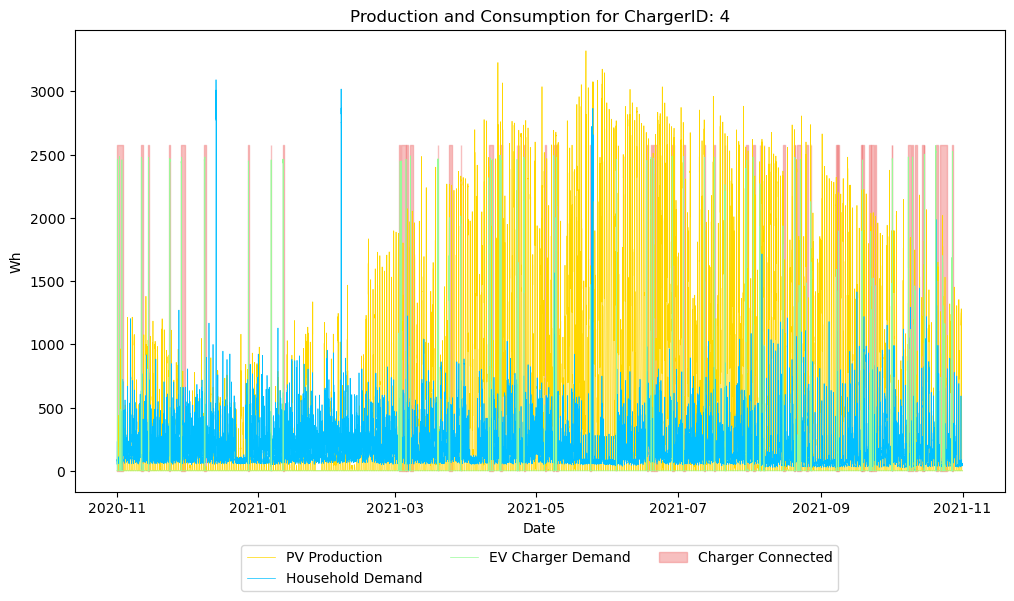

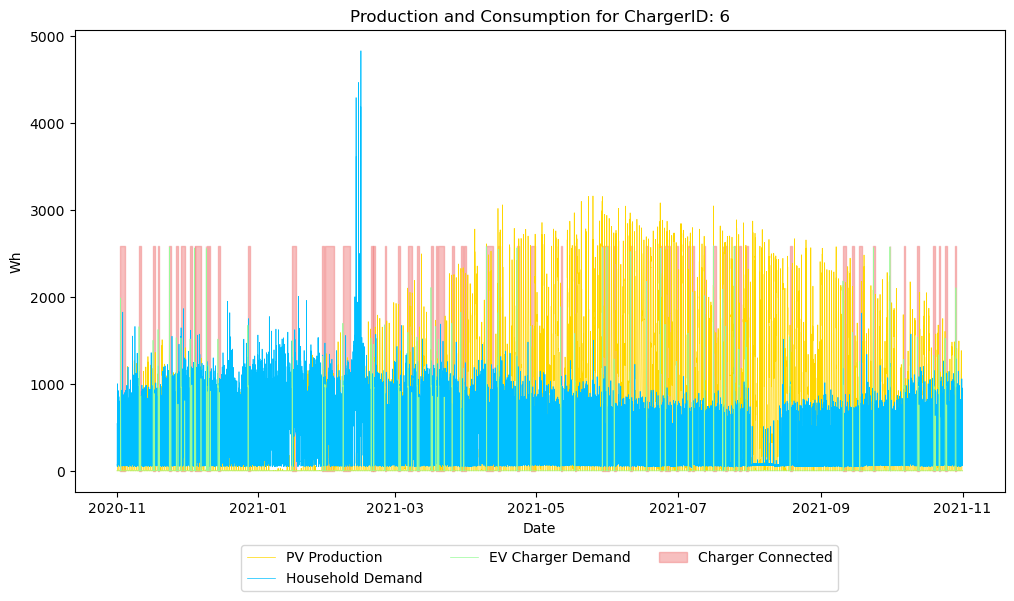

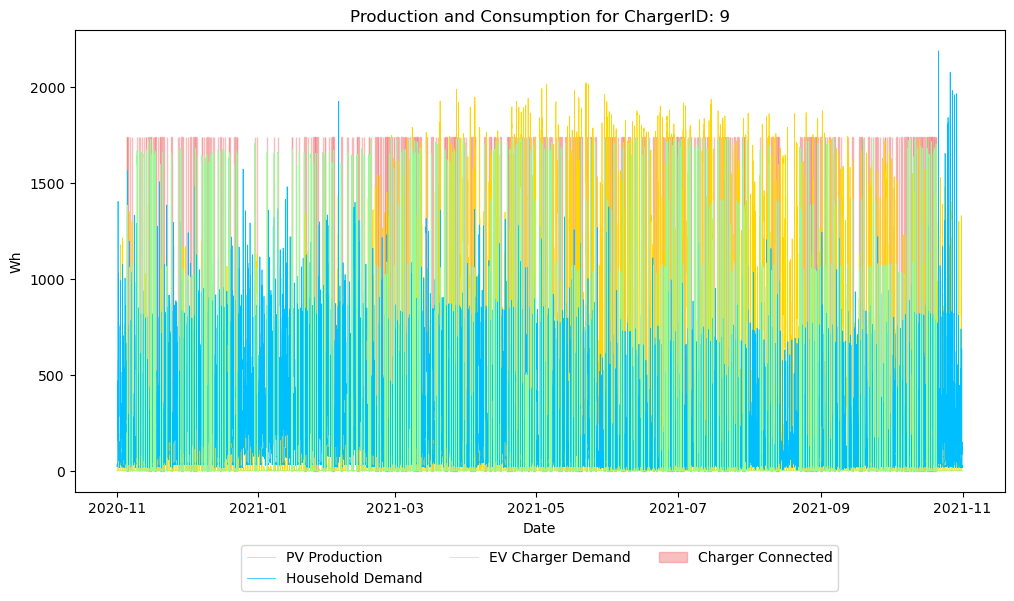

In [10]:
for i, dfi in charging_dfs.items():

    if not i in [4,6,9]:
        continue

    # fill NaNs in 'e_charger' with 0
    df = dfi.fillna({'e_charger':0}, inplace=False)

    # Resample the time series to daily, weekly, and monthly frequencies
    plt.figure(figsize=(12, 6))
    plt.plot(df['e_production'], label='PV Production', color=e_production_colors[0], linewidth=0.5)
    plt.plot(df['e_consumption'], label='Household Demand', color=e_consumption_colors[0], linewidth=0.5)
    plt.plot(df['e_charger'], label='EV Charger Demand', color=e_charger_colors[0], linewidth=0.5)

    # Highlight the background whenever 'e_charger' is not NaN
    plt.fill_between(dfi.index, 0, dfi['e_charger'].max(), where=np.isfinite(dfi['e_charger']), color='lightcoral', alpha=0.5, label='Charger Connected')

    plt.xlabel('Date')
    plt.ylabel('Wh')

    # Move the legend underneath the plot and make it wider with multiple columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

    plt.title(f'Production and Consumption for ChargerID: {i}')

    # Save the figure with transparent background
    #plt.savefig(f'Production_and_Consumption_{i}.png', transparent=True, bbox_inches='tight')

    plt.show()


In [64]:
charging_dfs[1]

,index,serial,charger_id_org,transaction_id,e_production,e_consumption,e_charger,charger_id,h_countdown,soc_ev
timestamp,,,,,,,,,,
2020-11-01 00:00:00+00:00,0,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,55.0,0.0,1,9.00,1.0
2020-11-01 00:15:00+00:00,1,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,37.0,0.0,1,8.75,1.0
2020-11-01 00:30:00+00:00,2,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,29.0,0.0,1,8.50,1.0
2020-11-01 00:45:00+00:00,3,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,29.0,0.0,1,8.25,1.0
2020-11-01 01:00:00+00:00,4,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,52.0,0.0,1,8.00,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-10-31 22:45:00+00:00,35035,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,NaN,0.0,41.0,NaN,1,-1.00,1.0
2021-10-31 23:00:00+00:00,35036,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,NaN,0.0,47.0,NaN,1,-1.00,1.0
2021-10-31 23:15:00+00:00,35037,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,NaN,0.0,64.0,NaN,1,-1.00,1.0


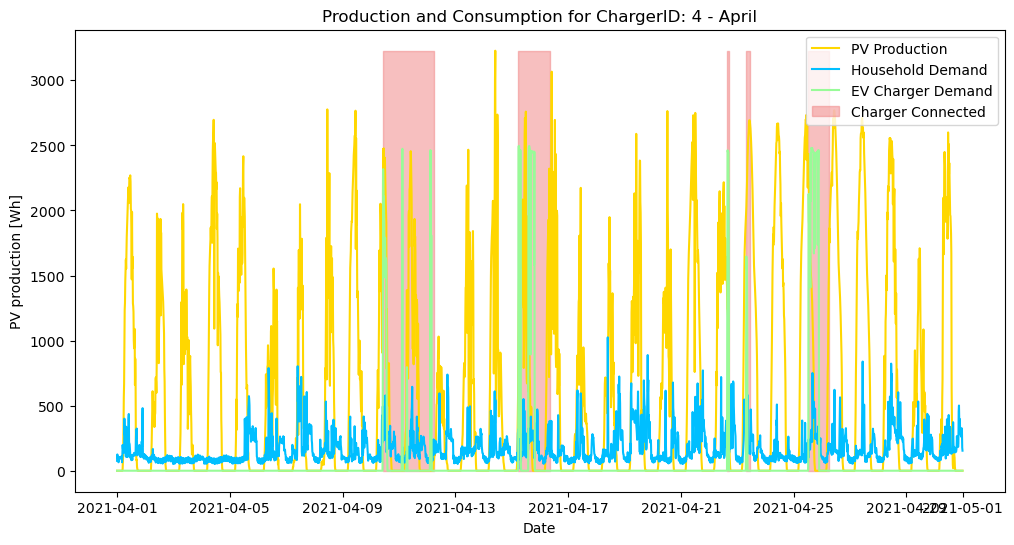

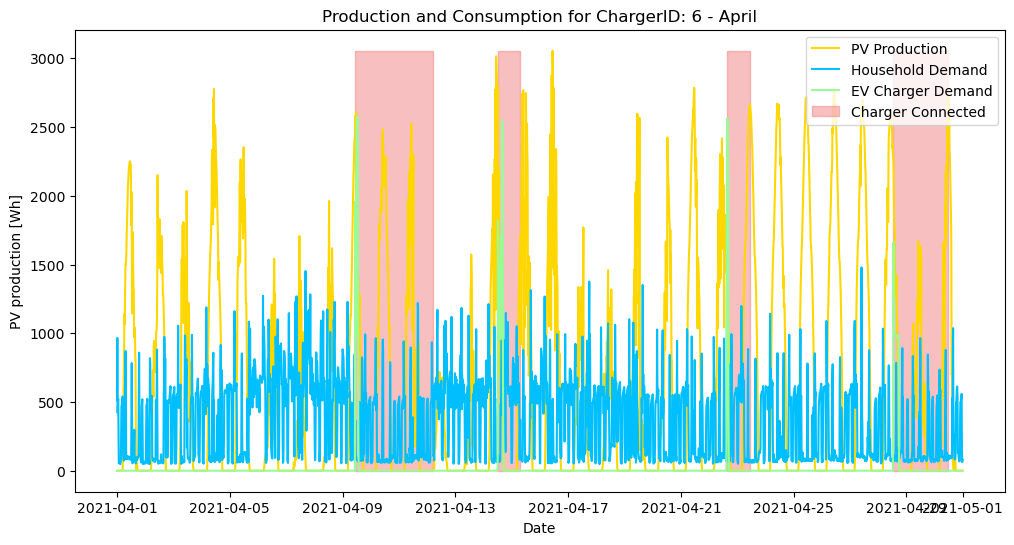

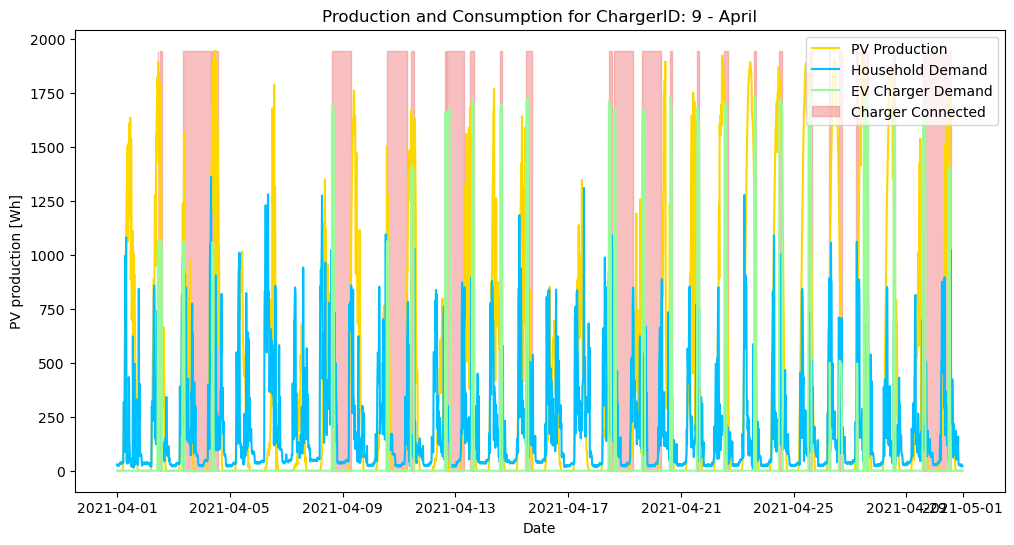

In [11]:

for i, dfi in charging_dfs.items():

    if not i in [4,6,9]:
        continue

    # fill NaNs in 'e_charger' with 0
    df = dfi.fillna({'e_charger':0}, inplace=False)

    plt.figure(figsize=(12, 6))
    # Plot the PV production data for April
    ax1 = plt.gca()
    e_production_line, = ax1.plot(df.loc['2021-04', 'e_production'], label='PV Production', color=e_production_colors[0])

    # Plot the Electrical Demand data for April
    e_consumption_line, = ax1.plot(df.loc['2021-04', 'e_consumption'], label='Household Demand', color=e_consumption_colors[0])

    # Plot the EV Charger Demand data for April
    e_charger_line, = ax1.plot(df.loc['2021-04', 'e_charger'], label='EV Charger Demand', color=e_charger_colors[0])

    # Highlight the background whenever 'e_charger' is not NaN
    charger_connected = ax1.fill_between(dfi.loc['2021-04', 'e_charger'].index, 0, dfi.loc['2021-04', ['e_charger', 'e_consumption', 'e_production']].max().max(),
                                         where=np.isfinite(dfi.loc['2021-04', 'e_charger']), color='lightcoral', alpha=0.5)

    ax1.set_xlabel('Date')
    ax1.set_ylabel('PV production [Wh]')
    ax1.set_title(f'Production and Consumption for ChargerID: {i} - April')

    # Create a patch for the fill_between area and add it to the legend
    charger_connected_patch = mpatches.Patch(color='lightcoral', alpha=0.5, label='Charger Connected')
    lines = [e_production_line, e_consumption_line, e_charger_line, charger_connected_patch]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper right')

    # Save the figure with transparent background
    #plt.savefig(f'Production_and_Consumption_{i}_April.png', transparent=True)

    plt.show()


2021-04-15
2021-07-17
2021-06-18
2021-07-04


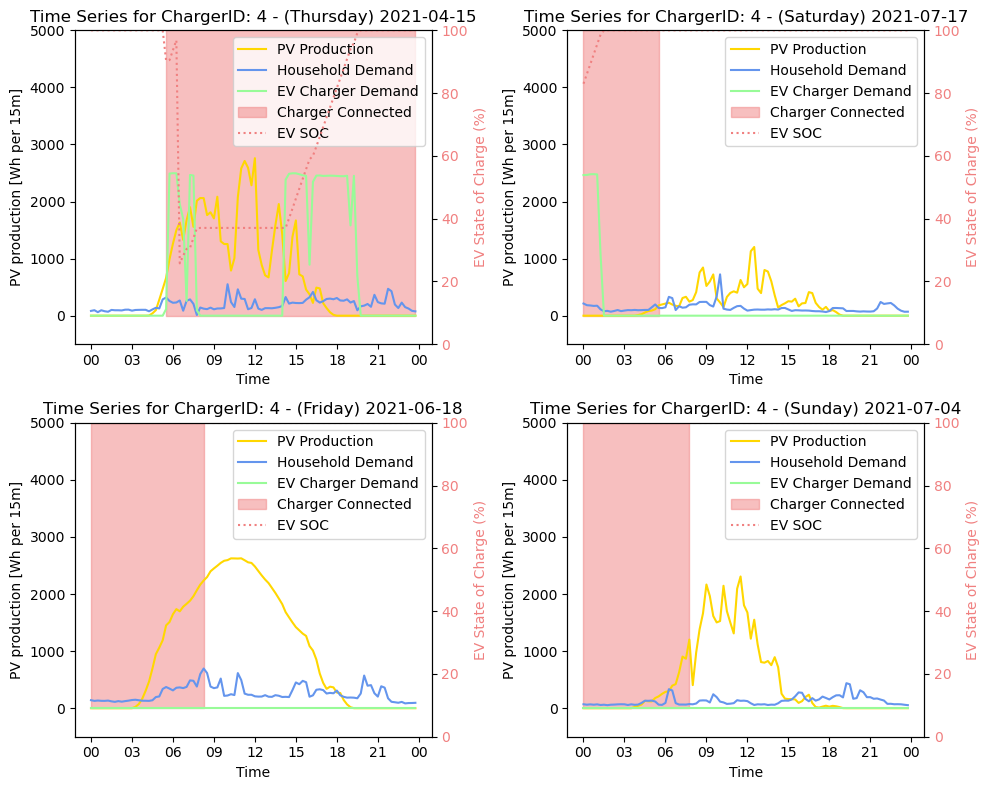

2020-11-30
2021-07-21
2021-09-15
2021-04-28


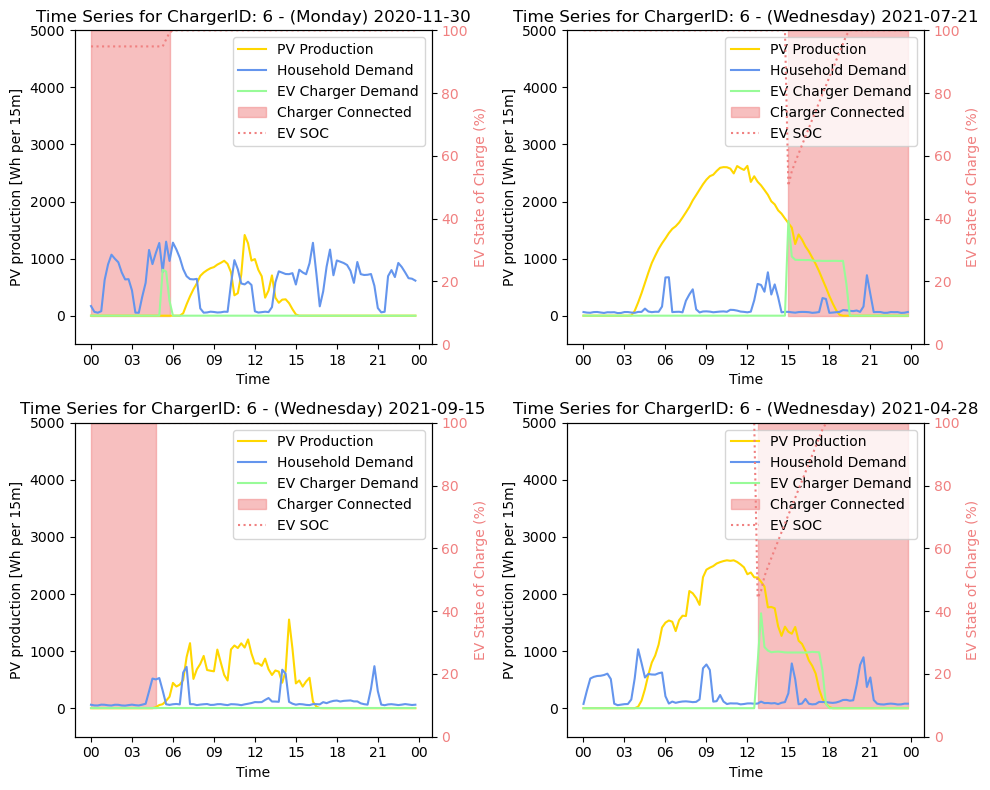

2021-02-06
2021-07-23
2020-12-08
2021-09-03


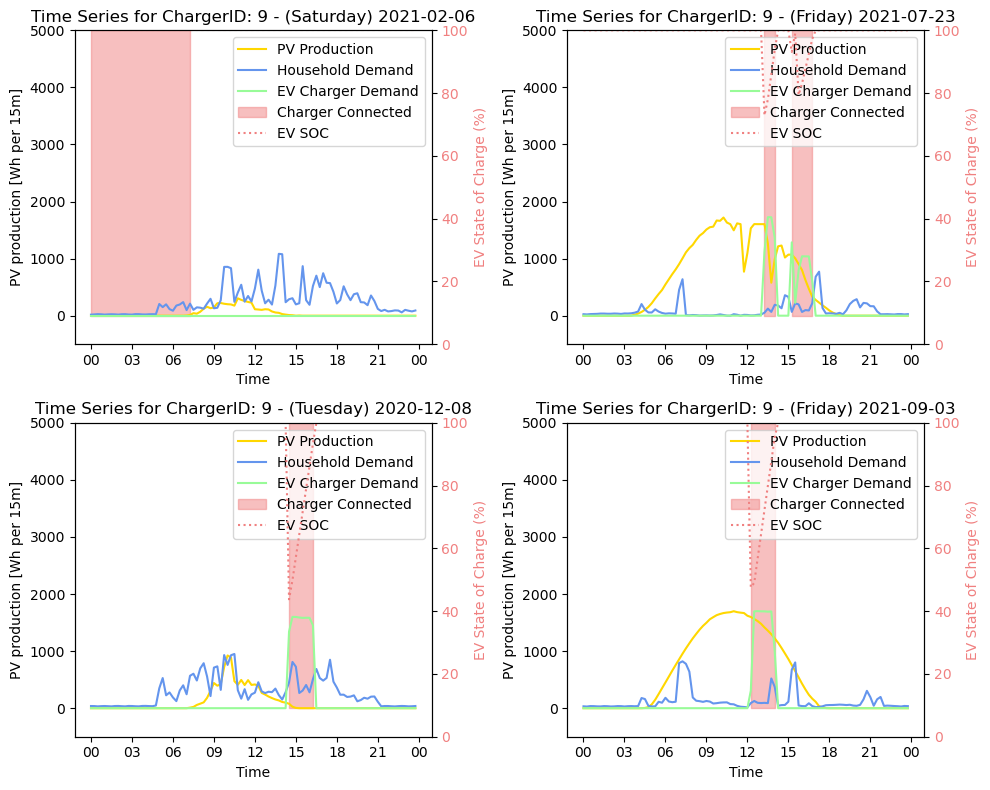

In [12]:
# Define the colors for each group of plots
e_production_colors = 'gold'
e_consumption_colors = 'cornflowerblue'
e_charger_colors = 'palegreen'

# Dates for which you want to plot the data
#dates = ['2021-02-19', '2021-07-22', '2021-09-28', '2020-11-28']

# iterate over each dataframe in the dictionary
for i, dfi in charging_dfs.items():

    if not i in [4,6,9]:
        continue

    # Resample the data to daily frequency, taking the max value each day
    dfi_copy = dfi.copy()
    daily_data = dfi_copy.resample('D').max()
    valid_dates = daily_data[daily_data['e_charger'].notna()].index
    num_dates = min(4, len(valid_dates))
    dates = random.sample(list(valid_dates), num_dates)


    # fill NaNs in 'e_charger' with 0
    df = dfi.fillna({'e_charger':0}, inplace=False)

    # Create subplots grid
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Plotting loop
    for j, date in enumerate(dates):
        # Determine the subplot position
        row = j // 2
        col = j % 2
        date = date.strftime('%Y-%m-%d')
        print(date)
        # Get the corresponding axis
        ax = axes[row, col]

        # Plot the PV production data for the specific date
        ax.plot(df.loc[date, 'e_production'], label='PV Production', color=e_production_colors)

        # Plot the Electrical Demand data for the specific date
        ax.plot(df.loc[date, 'e_consumption'], label='Household Demand', color=e_consumption_colors)

        # Plot the EV Charger Demand data for the specific date
        ax.plot(df.loc[date, 'e_charger'], label='EV Charger Demand', color=e_charger_colors)

        # Highlight the background whenever 'e_charger' is not NaN
        ax.fill_between(dfi.loc[date, 'e_charger'].index, 0, 5000, #change when no ylim #dfi.loc[date, ['e_charger', 'e_consumption', 'e_production']].max().max(),
                                             where=np.isfinite(dfi.loc[date, 'e_charger']), color='lightcoral', alpha=0.5, label='Charger Connected')

        ax.set_ylim(-500, 5000)

        # Change x axis format to just hours
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H'))

            # Create a twin axis for temperature
        ax2 = ax.twinx()
        ax2.plot((df.loc[date, 'soc_ev'] * 100), label='EV SOC', color='lightcoral', linestyle='dotted')
        ax2.set_ylabel('EV State of Charge (%)', color='lightcoral')
        ax2.tick_params(axis='y', labelcolor='lightcoral')

        ax2.set_ylim(0, 100)

        # extract weekday name
        specific_date = datetime.strptime(date, "%Y-%m-%d").date()
        weekday = specific_date.strftime("%A")

        # Customize the plot
        ax.set_xlabel('Time')
        ax.set_ylabel('PV production [Wh per 15m]')
        ax.set_title(f'Time Series for ChargerID: {i} - ({weekday}) {date}')

        # Combine the legends from both axes
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines + lines2, labels + labels2, loc='upper right')

        # Add the legend
        #ax.legend(loc='upper right')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Save the plots in one figure and remove the background (make it transparent)
    #fig.savefig(f'four_days_plots_{i}.png', transparent=True)

    # Display the plots
    plt.show()


Chargers 4, 6 and 9 are the ones with the highest amount of connected times.
Charger 9 has the most, but the mean connection duration is the lowest. There are many short connected times, sometimes multiple per day.
I choose charger 6 for a first trial with DRL.